# 1. Project Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# 2. Hypothesis  Generation with respect to problem statement

1. Item weight might effect a sales of the product.
2. Sales of the product may be depends on the items fat content.
3. More Item_Visibility of a particular product may be costlier than other products.
4. Item type could have an effect on the sales.
5. Are the items with more MRP have more item outlet sales?
6. Are the stores which have established earlier have more sales?
7. Size of the stores could have an effect on the item sales at a particular store.
8. Location of the stores might depends on the Item outlet sales.
9. Are the supermarkets have more sales than others?

# 3. Loading Data and Packages

Data We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.


| Variable             | Definition                                                                             	|
|----------------------	|----------------------------------------------------------------------------------------	|
| Item_Identifier         	| Unique Product ID                                                                  	|
| Item_Weight           	| Weight of product                                                               	|
| Item_Fat_Content       |Whether the product is low fat or not                                                       	|
| Item_visibility       	| The % of total display area of all products in a store allocated to the particular product                                                                        	|
| Item_Type              	| The category to which the product belongs.                                                                    	|
| Item_MRP  	| Maximum retail price(list price) of the product.                                                   	|
| Outlet_Identifier        	| Unique store ID. 	|
| Outlet_Establishment_Year  | The year in which store was established.                                                                  |
| Outlet_Size 	| The size of the store in terms of groud area covered.                                                  	|
| Outlet_Location_Type    	|The type of city in which the store is located.                                                             	|
| Outlet_Type     	| Whether the outlet is just a grocery store or some sort of supermarket                    	|
| Item_Outlet_Sales        	 |Sales of the product in the particulat store. This is the outcome variable to be predicted.  |                               	

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#lable encoding
#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the datasets

train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
#checking the columns of train and test data
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
#number of rows and columns in train data
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


### **Observations:**
* The train and test data is imported successfully.
* The train data consists of 8,523 training examples with 12 features.
* The test data consists of 5,681 training examples with 11 features.


# 4. Data Structure and content

In [6]:
#Basic info of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



#### OBSERVATION :

Numerical Features:
Item_Weight,
Item_Visibility,
Item_MRP,
Item_Outlet_Sales(Target Variable)


Categorical Features:
Item_Identifier,
Item_Fat_Content(Ordinal Feature),
Item_Type,
Outlet_Itemtifie,
Outlet_Establishment_Year,
Outlet_Size(Ordinal Feature),
Outlet__Location_Type(Ordinal Feature),
Ootlet_Type(Ordinal Feature)

##### All data types of columns are correct. There are some missing values in columns Item_Weight,Outlet_Size. We will treat them accordingly.

# 5. Find Missing Values & Treat them
In this section we are going to check whether our data contains missing values or not.

In [7]:
missing_col = train_data.isnull().sum()/len(train_data)*100
missing_col[missing_col>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

#### OBSERVATION :

 Since there are not huge amount of missing values, we can not drop the columns as we might loose important imformation. 
The reasons for missing values can be :
* The product wasn't weighed.
* The data provider didn't include the outlet size of some products.
* For the column Outlet_Size, the missing values  can be replaced with mode. For the numerical column Item_Weight, missing values can be replaced accordingly after checking the distribution.

In [8]:
#train
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].dropna().mode().values[0])

#test
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
train_data['Outlet_Size'].isnull().sum(),test_data['Outlet_Size'].isnull().sum()

(0, 0)

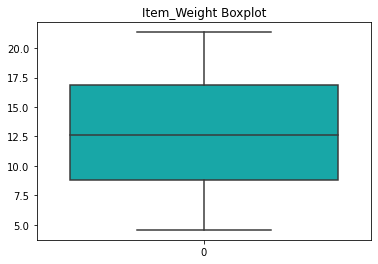

In [9]:
sns.boxplot(data=train_data['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")
plt.show()

##### Since there are no outliers so we will fill the missing data with the mean value for maximum efficiency.

In [10]:
#train
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].dropna().mean())

#test
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].dropna().mean())

#checking if we filled missing values
train_data['Item_Weight'].isnull().sum(),test_data['Item_Weight'].isnull().sum()

(0, 0)

# 6. Exploratory Data Analysis & Outlier Treatments

## 6.1 Univariate Analysis : Numerical Variables, Categorical Variables, Summary 

### Numerical Features

In [11]:
#Descriptive summary
print('Number of trainings examples:', len(train_data),'\n')
train_data.describe()

Number of trainings examples: 8523 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### **Observations:**
* Total count of Item_Weight is 7060 which is less than the length of the training dataset, therefore it may contains some missing values.
* The average weight of all items is 12kg and the maximum weight of the item is 21 kg. So it is clear that the stores are not selling heavy weight items.
* The maximum price of the items is 266, so we can say that the stores does not selling costly items like TV, mobile phones, laptops etc.
* Most recent store was established in 2009 and the oldest store was established in 1985.
* Average sales of items is Rs 2181 and the maximum sale is Rs 13,086.

In [12]:
def UVA_numeric(data, var_group, layout = None):
  '''
  data {dataframe}: the bulk data
  var_group {list}: list of variable to analyse
  layout{tuple}   : layout of visualisation (rows x columns)
  '''

  if layout == None:
    layout = (1,len(var_group))

  plt.figure(figsize = (layout[1]*10, layout[0]*10), dpi = 100)


  for j,i in enumerate(var_group):
    min = data[i].min()
    max = data[i].max()
    range = data[i].max() - data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    std_dev = data[i].std()
    skew = data[i].skew()
    kurtosis = data[i].kurtosis()

    points = mean-std_dev, mean+std_dev

    #plotting of numeric features with all information.
    plt.subplot(layout[0],layout[1],j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'red', label = 'std_dev')
    sns.scatterplot([min,max], [0,0], color ='red', label = 'min/max')
    sns.scatterplot([mean], [0], color = 'blue', label = 'mean')
    sns.scatterplot([median], [0], color = 'green', label = 'median')
    plt.xlabel('{}'.format(i), fontsize = 20, fontweight = 'bold')
    plt.ylabel('Density', fontsize = 16, fontweight = 'bold')
    plt.title('std_dev = {}; kurtosis = {};\n skew = {}; range = {};\n mean = {}; median = {}'.format
                                                                                              ((round(points[0],2), round(points[1],2)),
                                                                                               round(kurtosis,2), round(skew,2),
                                                                                               (round(min,2), round(max,2), round(range,2)),
                                                                                               round(mean,2),
                                                                                               round(median,2)))

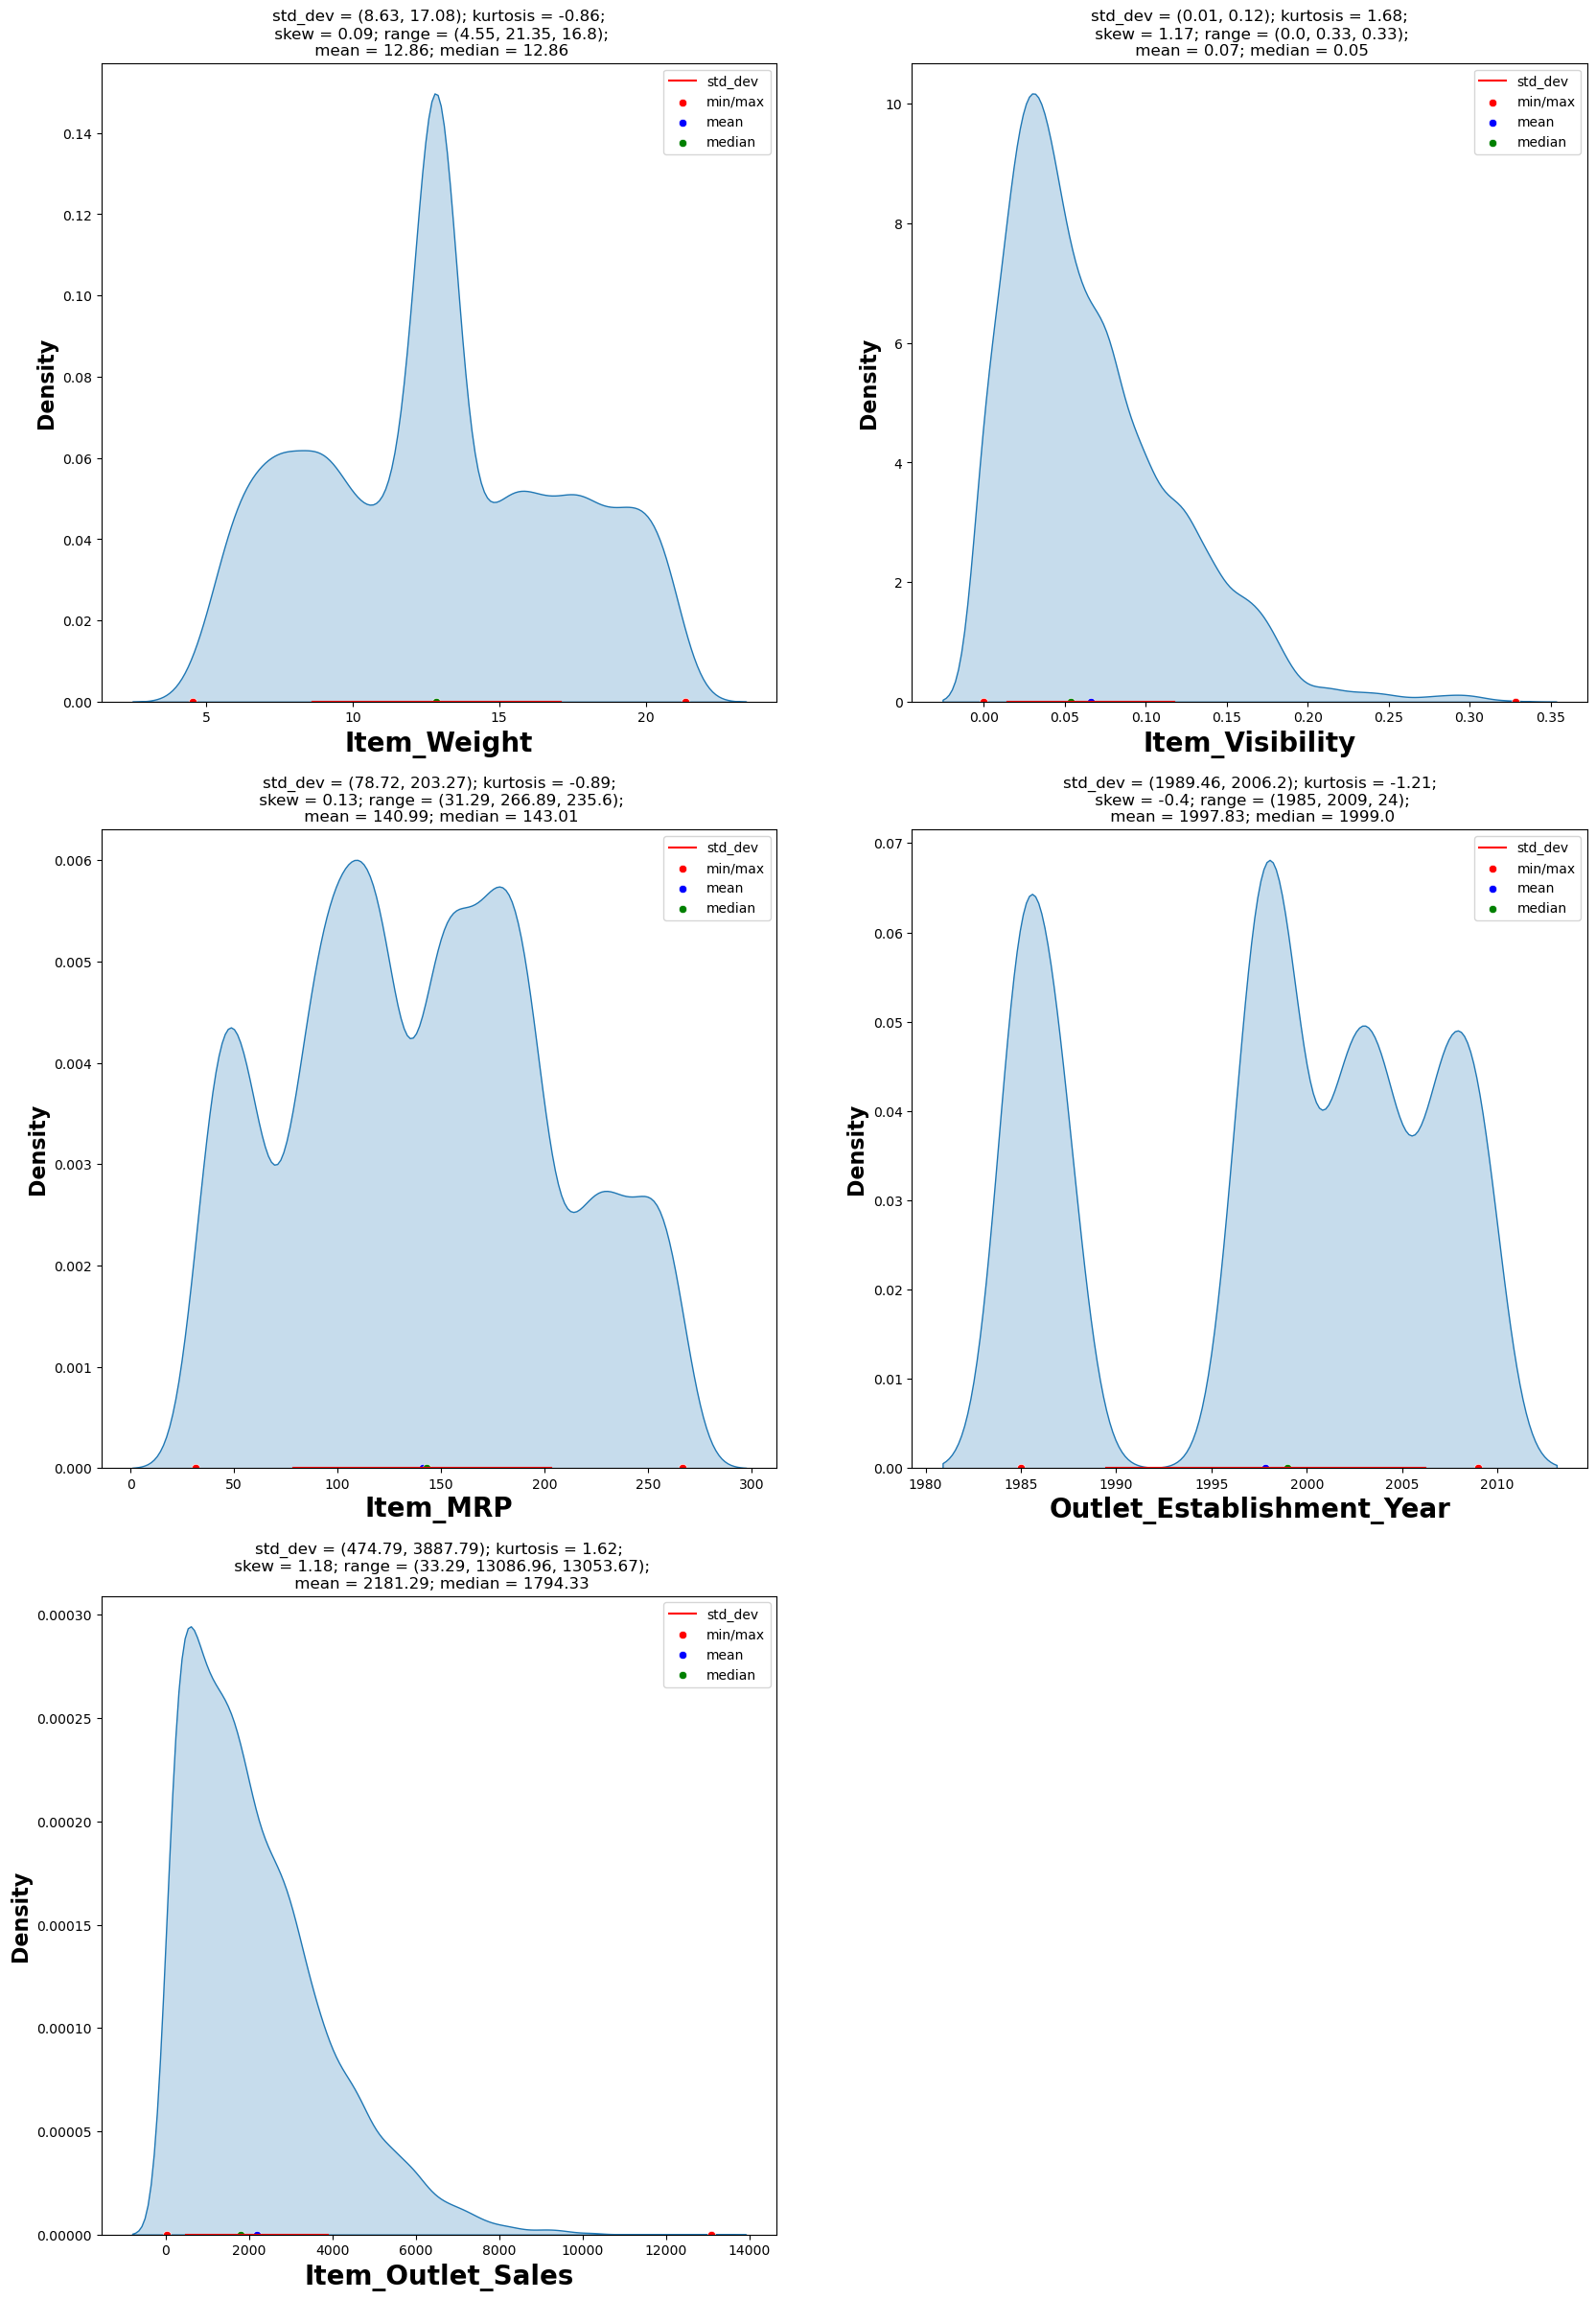

In [13]:
numerical = train_data.select_dtypes(include = ['int64', 'Int64','float64']).dtypes.index
UVA_numeric(train_data, numerical, (3,2))

### **Observation:**
* The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12.
* There are some items that are not visible at all and the maximum visibility of the item is 33%.
* The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89.
* Most of the stores are established in year from 1985-1990 and 1995 to 2000.
* From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period.
* Most of the stores has a maximum sales in between 450 - 3900 number of items. Only few of the stores sold more than 6000 items.

### **New Hypothesis**
* Are the items with less visibility having more sales.


### Categorical Features

In [14]:
train_data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [15]:
def UVA_Categorical(data, cat):
  plt.figure(figsize = (10,6))
  sns.countplot(cat, data = data)
  plt.xlabel(cat,fontsize = 14, fontweight = 'bold')
  plt.ylabel('Count',fontsize = 14, fontweight = 'bold')
  plt.title('Value counts: \n{}'.format(train_data[cat].value_counts(normalize = True)))

  # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)
  plt.show()

In [16]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### Observation :
Since Low Fat,LF and low fat are same thing and reg and Regular are same thing with different spellings, we need to rename them.

In [17]:
train_data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train_data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train_data['Item_Fat_Content'].replace('reg','Regular',inplace=True)

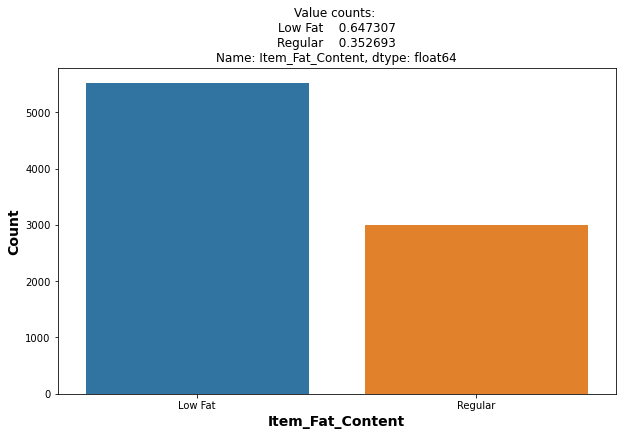

In [18]:
UVA_Categorical(train_data,'Item_Fat_Content')

### **Observation:**
* Around 64% of the total items contains low fat while remaining contains regular fat.




In [19]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

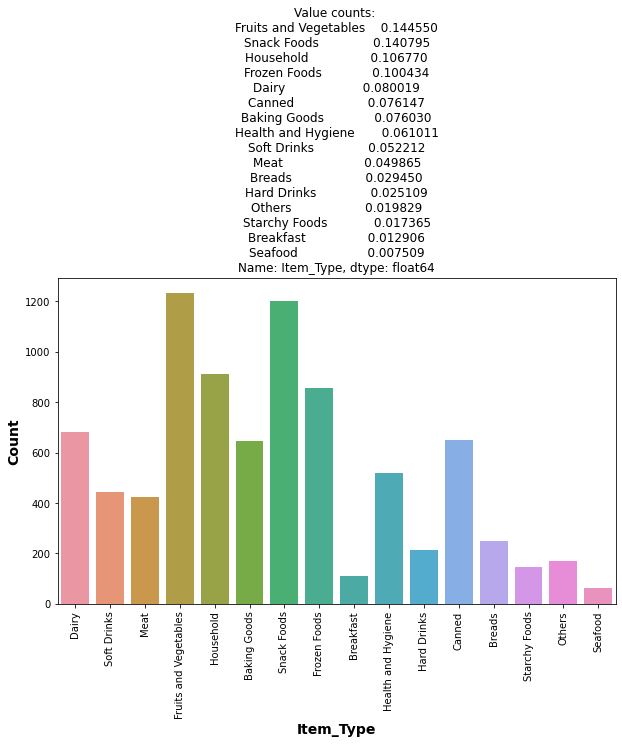

In [20]:
UVA_Categorical(train_data, 'Item_Type')

### **Oservations:**
* Stores sale more than 14%(ie more than 1200 items) fruits & vegetables and snacks items.
* Household items and frozen foods are also sold in good numbers.
* Sale of breakfast and seafood type of items are very less.

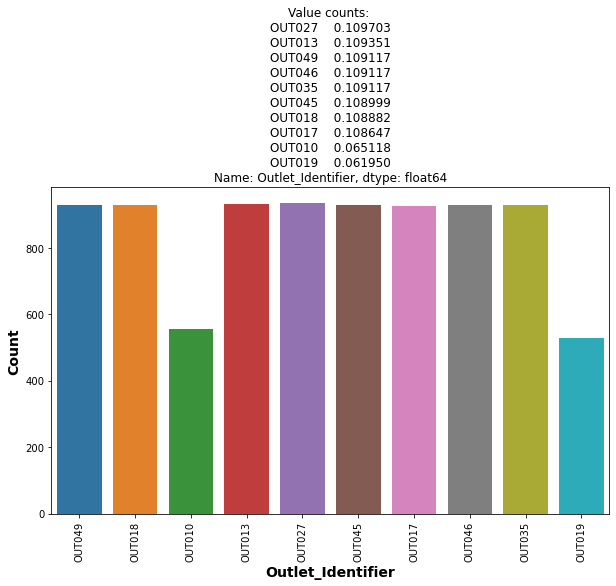

In [21]:
UVA_Categorical(train_data, 'Outlet_Identifier')

### **Observations:**
* There are total 10 stores.
* All the stores are selling almost same number of items except the OUT010 and OUT019 stores
* Check whether the store Id OUT010 and OUT019 are recently opened store and if not then why they have sale the less number of items.

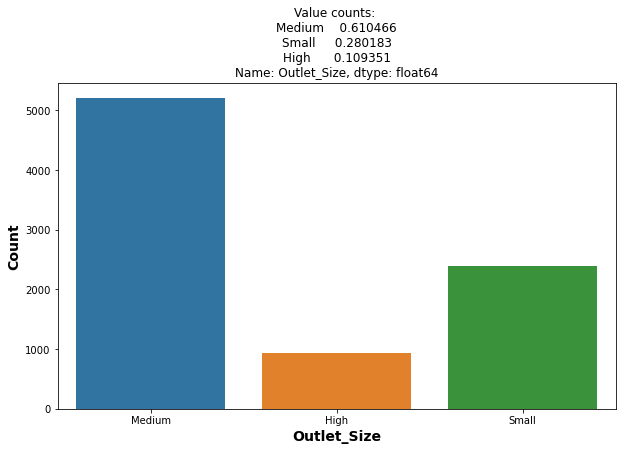

In [22]:
UVA_Categorical(train_data,'Outlet_Size')

### **Observations:**
* 45% of the total number of items are sell from medium size store while only 15% items are sell from store which are very big.

### **Hypothesis**
* Are the stores with medium size have high sale than others.

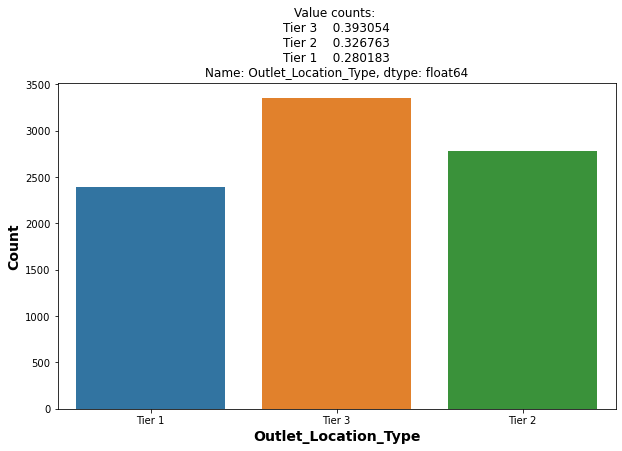

In [23]:
UVA_Categorical(train_data, 'Outlet_Location_Type')

### **Observations:**
* 39% of the items sells from the stores located in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities.

### **Hypothesis**
* Are the stores located in Tier 3 cities have more sale than other.

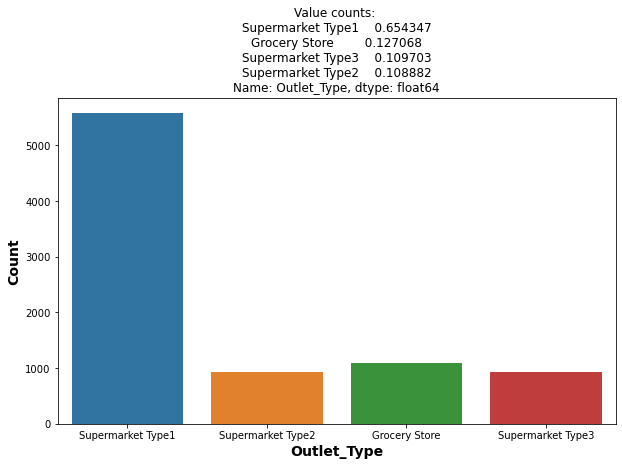

In [24]:
UVA_Categorical(train_data, 'Outlet_Type')

### **Observations**
* 65% of the items are sell from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores.

### **Hypothesis**
* Are the Supermarket Type 1 type of stores have more sales than other type of stores.

## 6.2 Bivariate Analysis: Numerical-Numerical
In this section we are going to explore and analyze the data with two numerical features taking at a time.

### ** Hypothesis falling under this section.**
* Are the items with less visibility having more sales.
* Item weight might effect a sales of the product.
* Are the items with more MRP having more Outlet_Sales.

In [25]:
numerical = train_data.select_dtypes(include = ['int64','float64','Int64'])
numerical.dtypes.index

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
#correlation among columns
numerical.corr(method = 'pearson')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


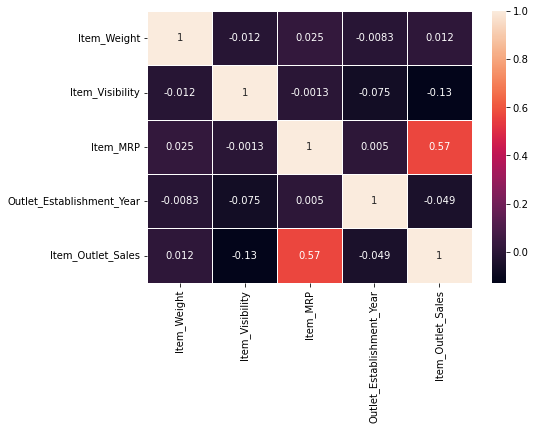

In [27]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.heatmap(numerical.corr(method = 'pearson'), cbar = True, annot = True,linewidths = 1)
plt.show()

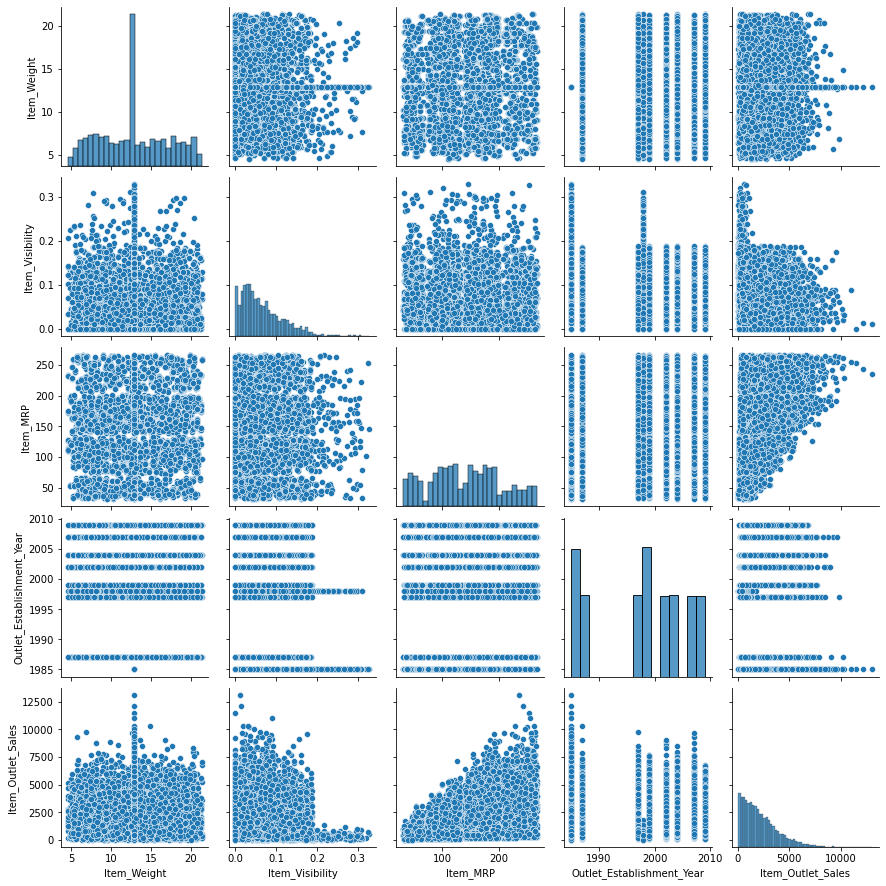

In [28]:
sns.pairplot(numerical)
plt.show()

### **Observation:**
* Item_MRP is somewhat correlated with Item_Outlet_Sales. So Item_MRP can be important feature for predicting Item_Outlet_Sales at particular store.
* Increase in the item_visibility can decrease the item outlet sales because it is having negative correlation.
* Item weight and Item_Establishment_Year does not have any realationship with Item_Outlet_Sales.

## 6.3 Bivariate Analysis: Numerical and Categorical
* In this we are going to analyze our data with one categorical feature and a target variable(numerical) and also perform some hypothesis testing falling in this section.

### **Hypothesis falling under this section.**
* Are the items contain low fat have more sales than the items contain regular fat.
* Are the stores with medium size have high Item Outlet sales than others.
* Check whether the store Id OUT010 and OUT019 are recently opened store and if not then why they have sale the less number of items.
* Are the stores located in Tier 3 cities have more sales than other.
* Are the Supermarket Type 1 type of stores have more sales than other type of stores.

In [29]:
categorical = train_data.select_dtypes(include = 'object')
categorical.dtypes.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## **Anova test**
Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

* The statistic which measures if the means of different samples are significantly different or not is called the F-Ratio. Lower the F-Ratio, more similar are the sample means. In that case, we cannot reject the null hypothesis.

<center>F = Between group variability / Within group variability</center>

In [30]:
def Bivariate_cont_cat(data, cont, cat, p_value, f_value, sign_level):

  # Checking hypothesis
  if p_value < sign_level and f_value > 1:
    sign = True
  else :
    sign = False

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  

  # Visualization
  plt.figure(figsize = (20,6),dpi = 120)
  

  # barplot
  plt.subplot(1,3,1)
  sns.barplot(x = cat, y = cont, data = data, hue = cat)
  plt.title('anova-test P value = {} \n anova_test F value = {} \n Significant difference = {} \n{}'.format(p_value, f_value, sign, table))
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)

  

  # Kdeplot
  #plt.subplot(1,3,2)
  #sns.kdeplot(x = cont, hue = cat, data = data,shade = True)
  #plt.title('Category Distribution', fontsize = 14, fontweight = 'bold')

  # Boxplot for checking Outliers
  plt.subplot(1,3,3)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot',fontsize = 14, fontweight = 'bold')
  
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)


  

* ## **Are the items contain low fat have more sales than the items contain regular fat.**

In [31]:
df_anova = train_data[['Item_Outlet_Sales','Item_Fat_Content']]
grouped_anova = df_anova.groupby(['Item_Fat_Content'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Low Fat')['Item_Outlet_Sales'],grouped_anova.get_group('Regular')['Item_Outlet_Sales'])
print(f_value, p_value)

2.98666429015733 0.08398916967694944


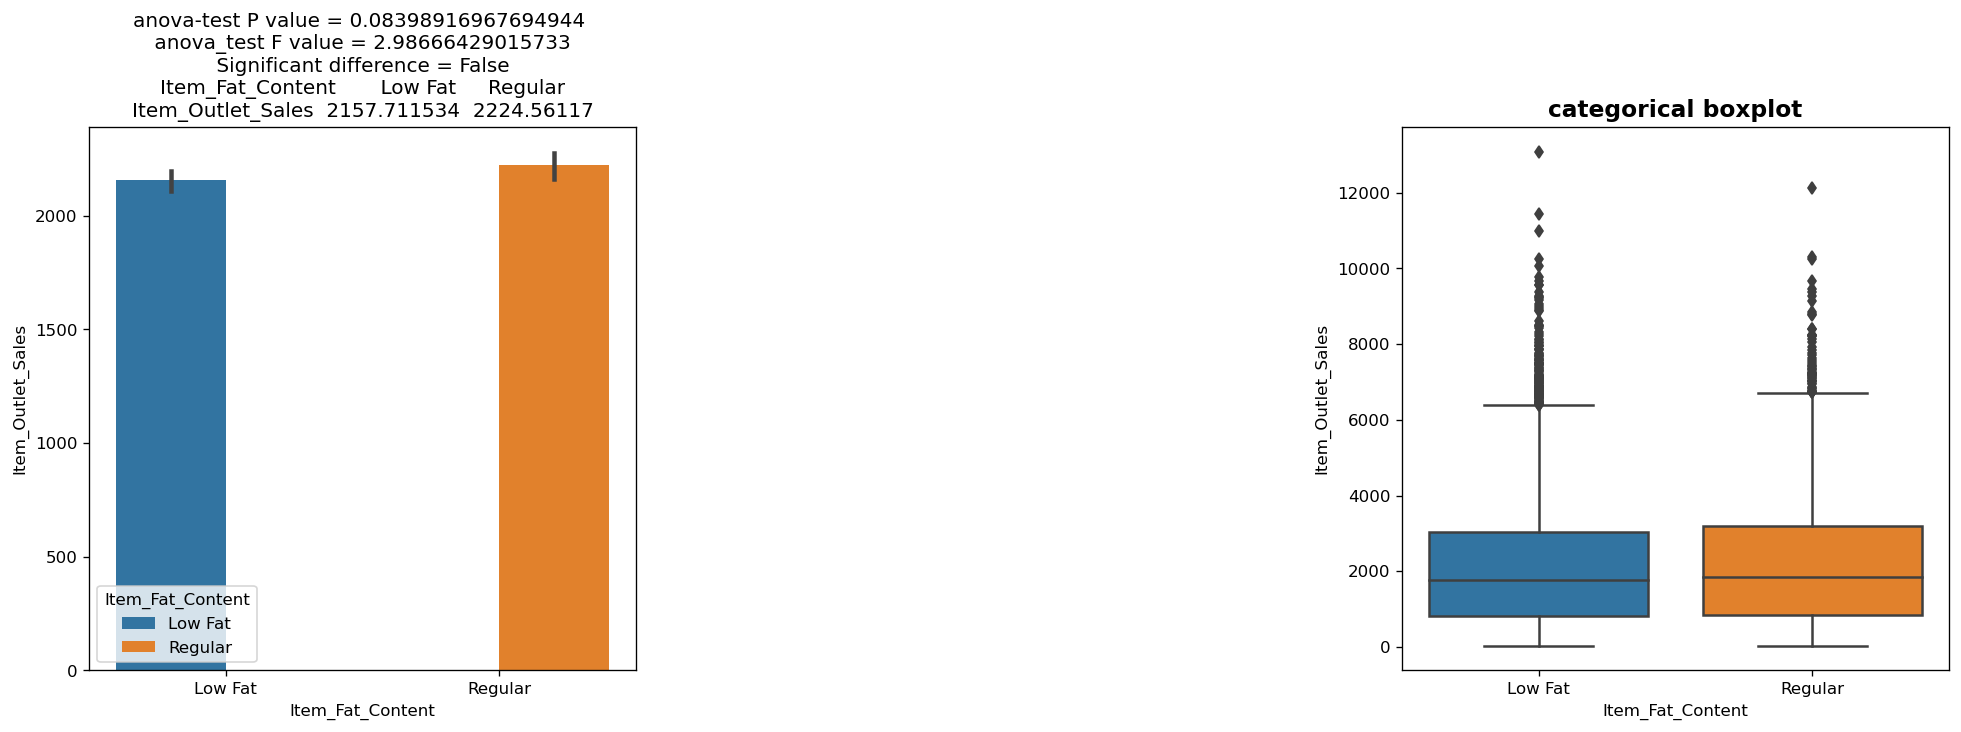

In [32]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Item_Fat_Content',p_value,f_value, 0.01)

### Observation:
* There is no significance difference with the Item Fat Content.
* The distribution of Item Fat Content is slightly right skew.
* Outliers shown in the boxplot is due to much difference in the Item sales of different Items.


## Item Sales Vs Item Type

In [33]:
df_anova = train_data[['Item_Outlet_Sales','Item_Type']]
grouped_anova = df_anova.groupby(['Item_Type'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Dairy')['Item_Outlet_Sales'],grouped_anova.get_group('Soft Drinks')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Meat')['Item_Outlet_Sales'], grouped_anova.get_group('Fruits and Vegetables')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Baking Goods')['Item_Outlet_Sales'],grouped_anova.get_group('Frozen Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breakfast')['Item_Outlet_Sales'], grouped_anova.get_group('Health and Hygiene')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Hard Drinks')['Item_Outlet_Sales'], grouped_anova.get_group('Canned')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breads')['Item_Outlet_Sales'],grouped_anova.get_group('Starchy Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Others')['Item_Outlet_Sales'],grouped_anova.get_group('Seafood')['Item_Outlet_Sales'])
print(f_value, p_value)

2.531322277281526 0.0017939203039080086


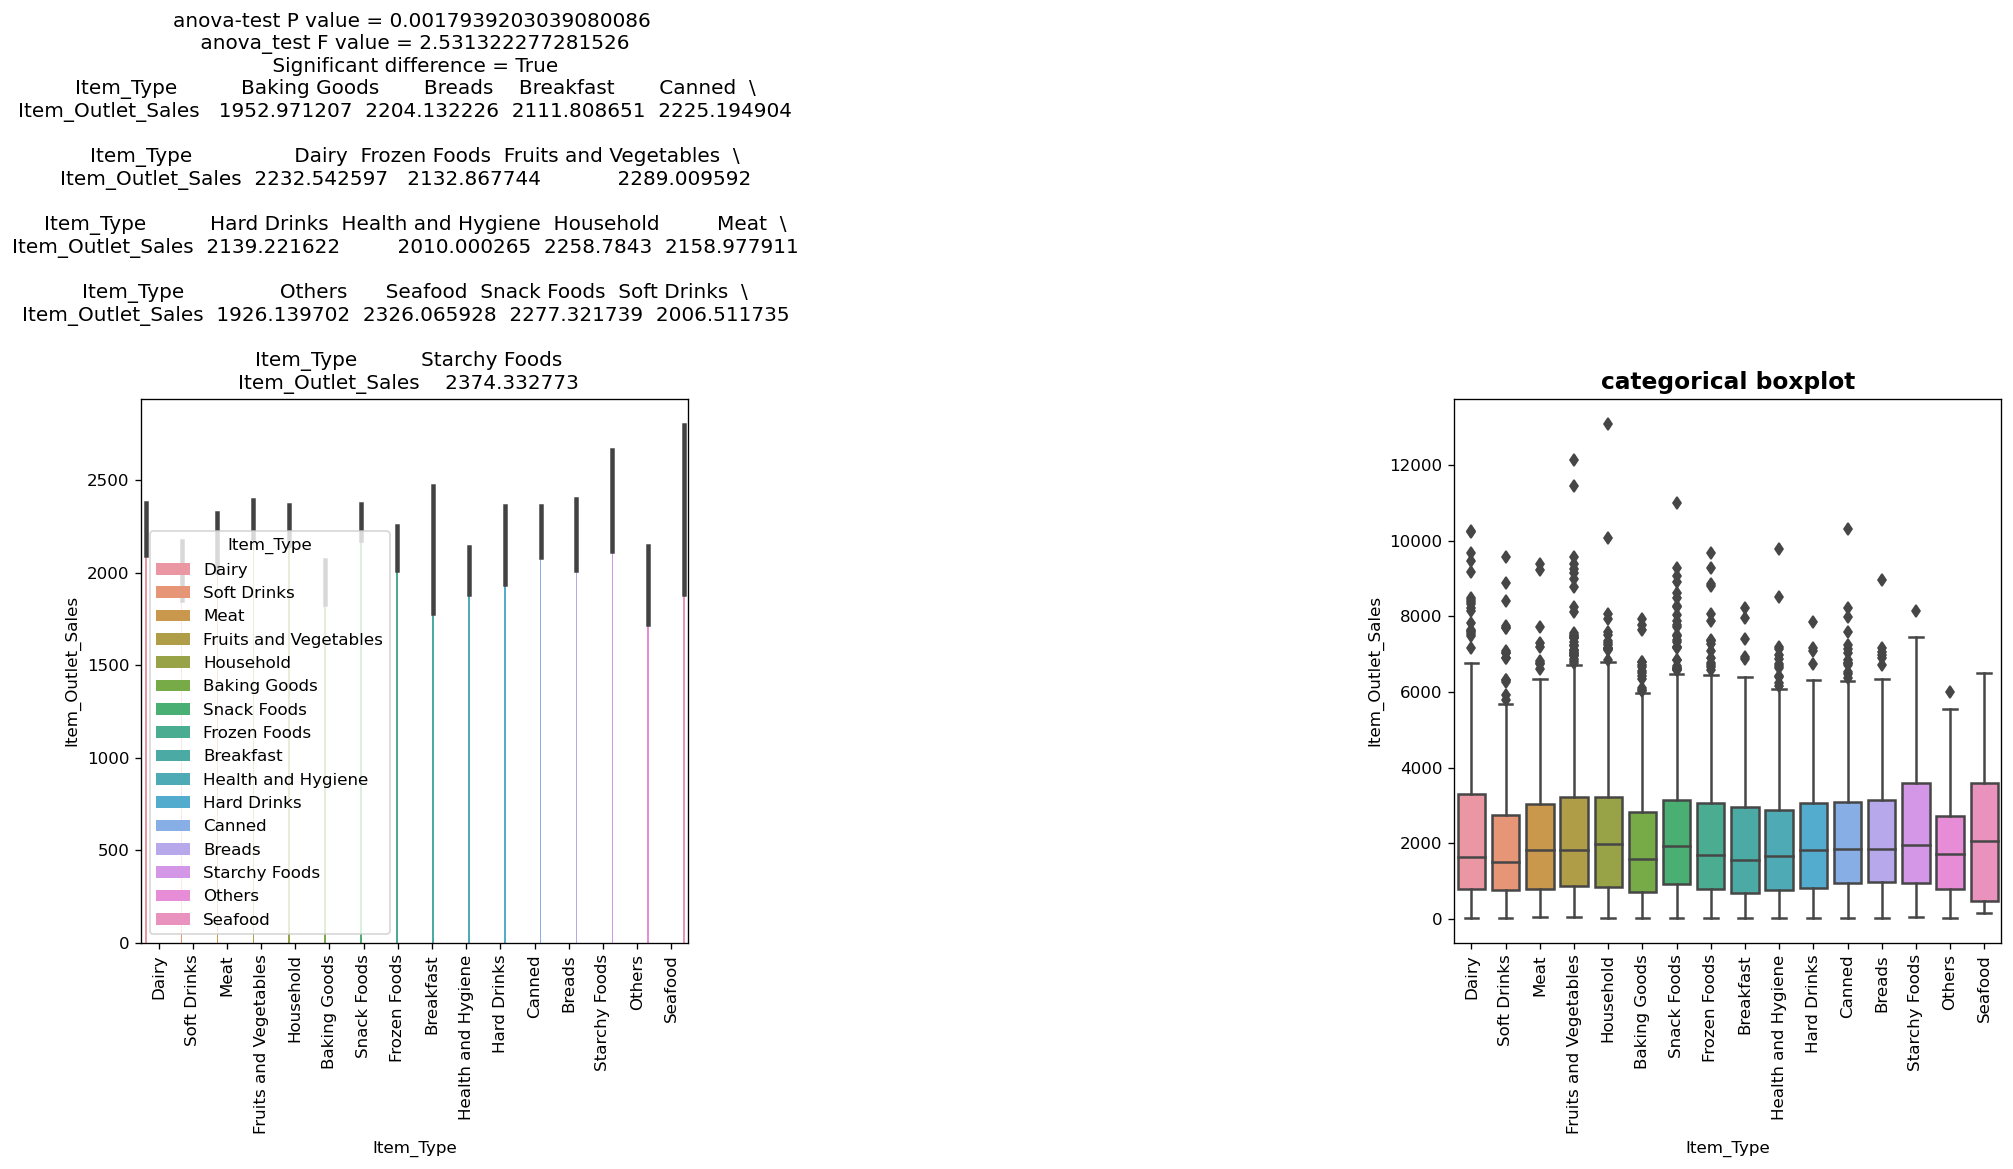

In [34]:
Bivariate_cont_cat(train_data, 'Item_Outlet_Sales','Item_Type',p_value, f_value, 0.05)

### Observation
* There is a significance difference between Item sales of different item types.
* Fruit and vegetables, Snack and starchy foods and diary products make higher Item Outlet sales than others.

* ## **Are the stores with medium size have high sale than others.**

In [35]:
train_data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [36]:
df_anova = train_data[['Item_Outlet_Sales','Outlet_Size']]
grouped_anova = df_anova.groupby(['Outlet_Size'])
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Medium')['Item_Outlet_Sales'],grouped_anova.get_group('High')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Small')['Item_Outlet_Sales'])
print(f_value,p_value)

41.68553754650835 9.642803947830672e-19


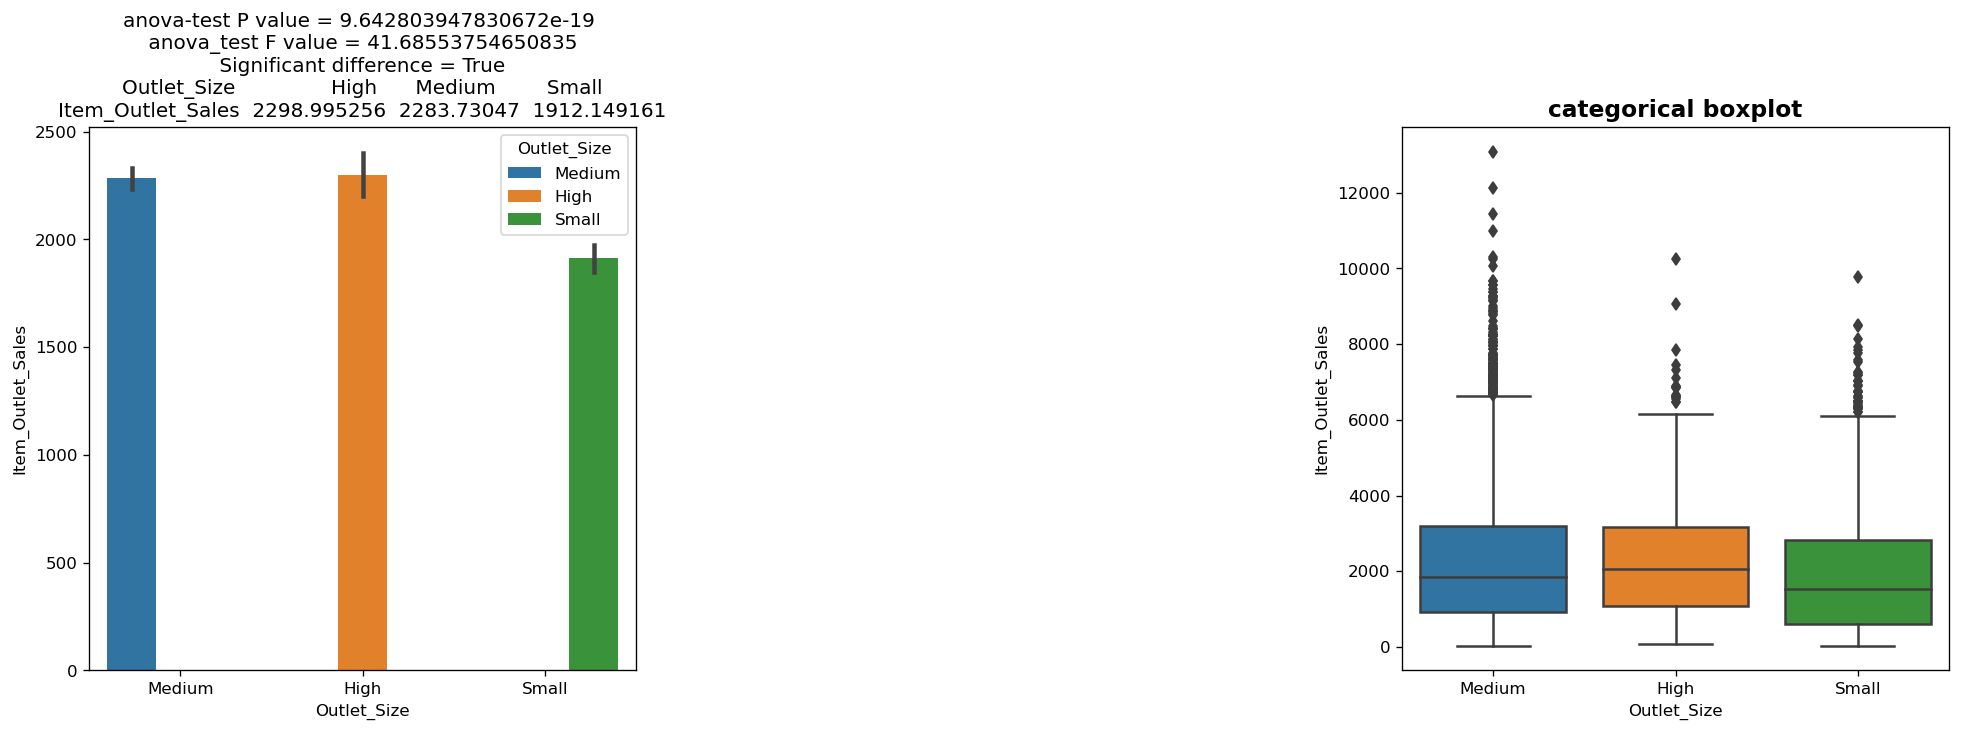

In [37]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Outlet_Size',p_value, f_value, sign_level = 0.05)

### **Observation:**
* Yes there is a significance difference between Item Outlet Sales of stores with different Outlet Size.
* Medium size and High size stores have nearly same Item Outlet sales than others, while the small size stores have the least Item Outlet sales.
* Mean Item Outlet sales of the 'Medium' Outlet size is above 2284 while that of 'High' is 2230 and 'Small' is of below 2000.

* ##  **Are the stores located in Tier 3 cities have more sales than other.**

In [38]:
df_anova = train_data[['Item_Outlet_Sales','Outlet_Location_Type']]
grouped_anova = df_anova.groupby('Outlet_Location_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Tier 1')['Item_Outlet_Sales'],grouped_anova.get_group('Tier 2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Tier 3')['Item_Outlet_Sales'])
print(f_value,p_value)

53.947739874560675 5.2228172988842975e-24


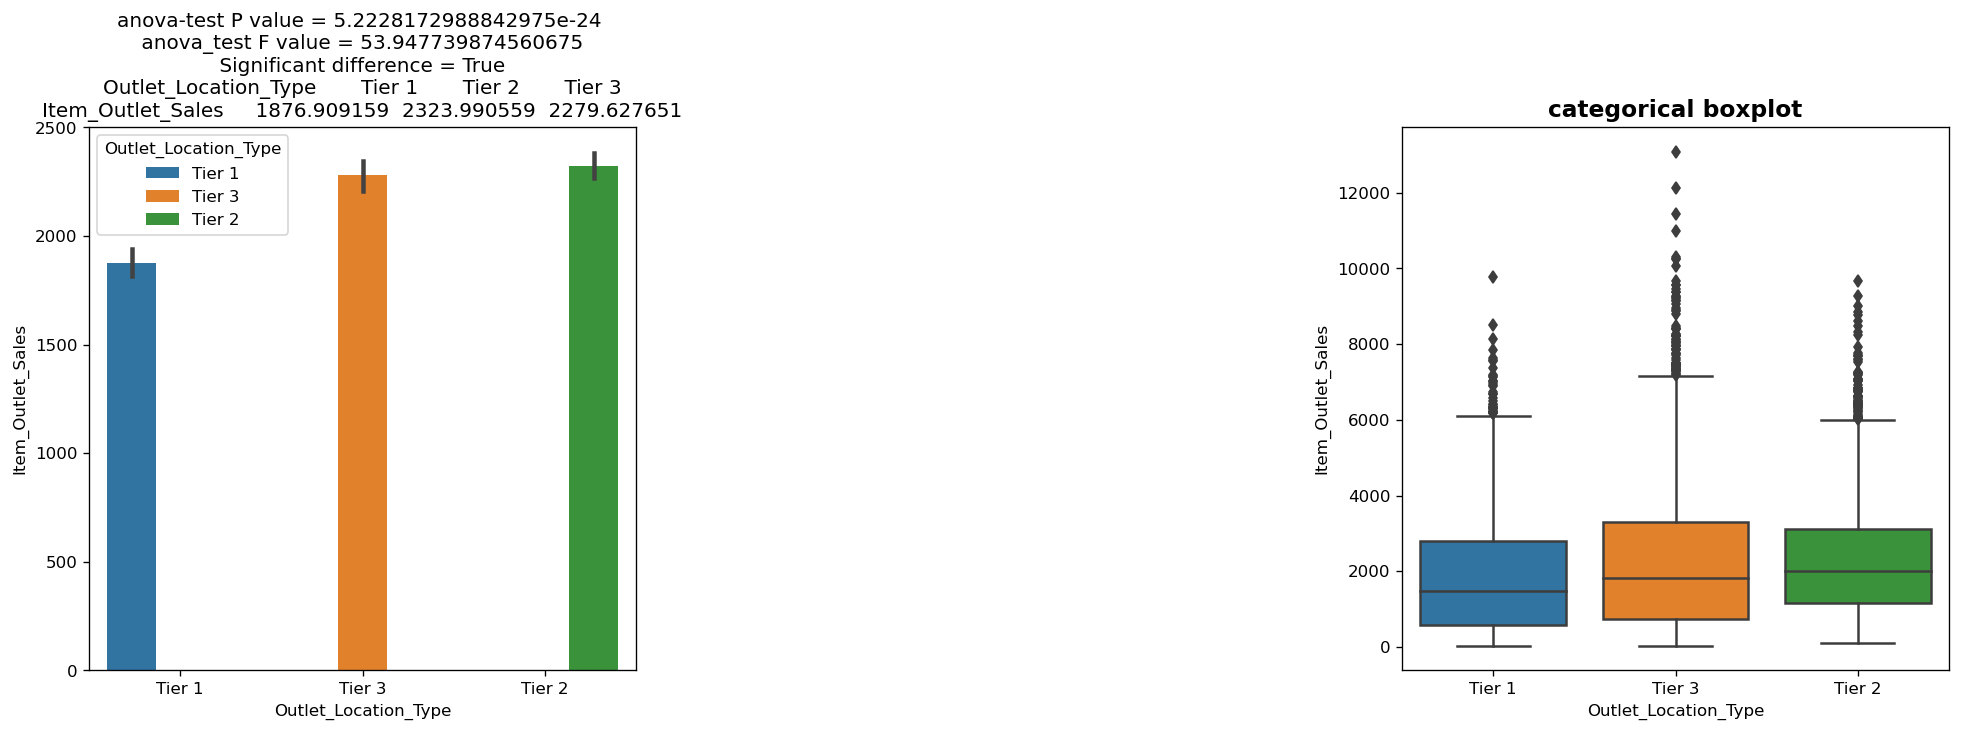

In [39]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Outlet_Location_Type', p_value, f_value, sign_level = 0.05)

### **Observation:**
* There is a significance difference between the Item Outlet Sales of stores of different Outlet Location Type.
* Tier 2 cities have most sales while Tier 1 cities least sales. 
* The average sale of Tier 2 cities is 2324 while that of Tier 3 is 2279.

* ### **Are the Supermarket Type 1 type of stores have more sales than other type of stores.**

In [40]:
df_anova = train_data[['Item_Outlet_Sales','Outlet_Type']]
grouped_anova = df_anova.groupby('Outlet_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Supermarket Type1')['Item_Outlet_Sales'],grouped_anova.get_group('Supermarket Type2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Supermarket Type3')['Item_Outlet_Sales'])
print(f_value,p_value)

343.9181990337556 1.402711127727785e-143


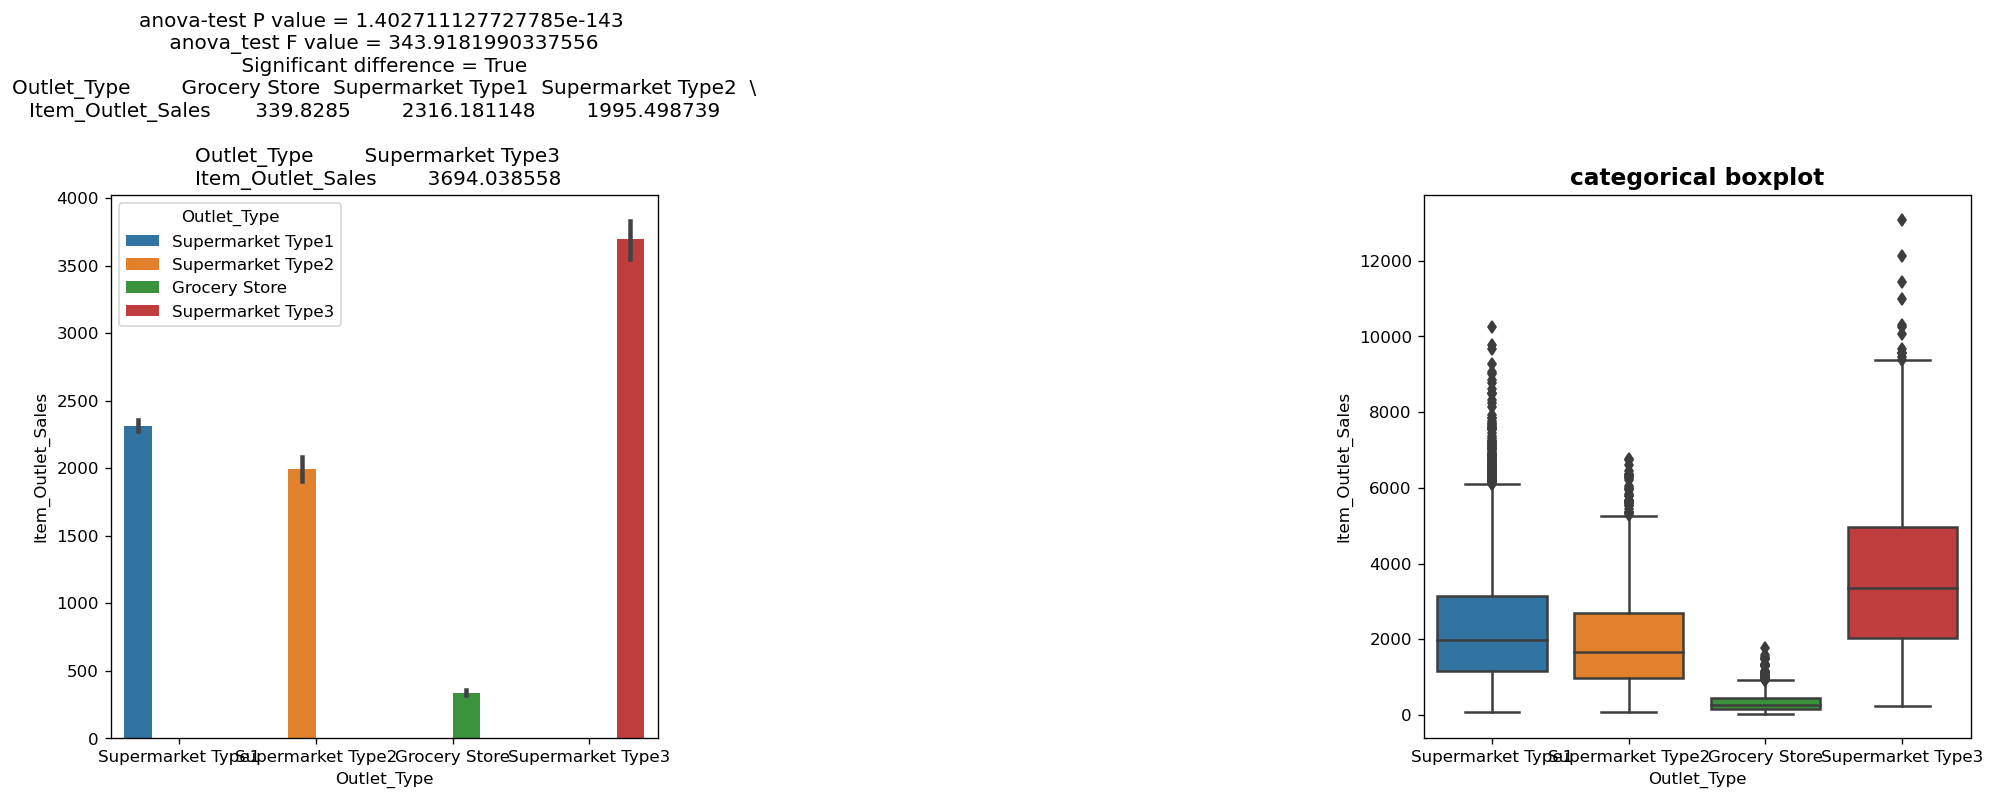

In [41]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Outlet_Type', p_value,f_value, sign_level=0.05)

### **Observation:**
* There is a significance difference between the Item Outlet Sales of stores of different Outlet Type.
* The supermarket Type 2 have less sales than other supermarkets.
* Supermarket type 3 have the most sales than others and the average sales of the Supermarket Type 3 is 3694.
* Grocery store has the least Item Outlet sales among all the outlet types.

* ## **Are the different stores affect the Item Outlet Sales.**

In [42]:
df_anova = train_data[['Item_Outlet_Sales','Outlet_Identifier']]
grouped_anova = df_anova.groupby('Outlet_Identifier')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('OUT049')['Item_Outlet_Sales'],grouped_anova.get_group('OUT018')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT010')['Item_Outlet_Sales'],grouped_anova.get_group('OUT013')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT027')['Item_Outlet_Sales'],grouped_anova.get_group('OUT045')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT017')['Item_Outlet_Sales'],grouped_anova.get_group('OUT046')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT019')['Item_Outlet_Sales'],grouped_anova.get_group('OUT035')['Item_Outlet_Sales'])
print(f_value,p_value)

300.07913532849034 0.0


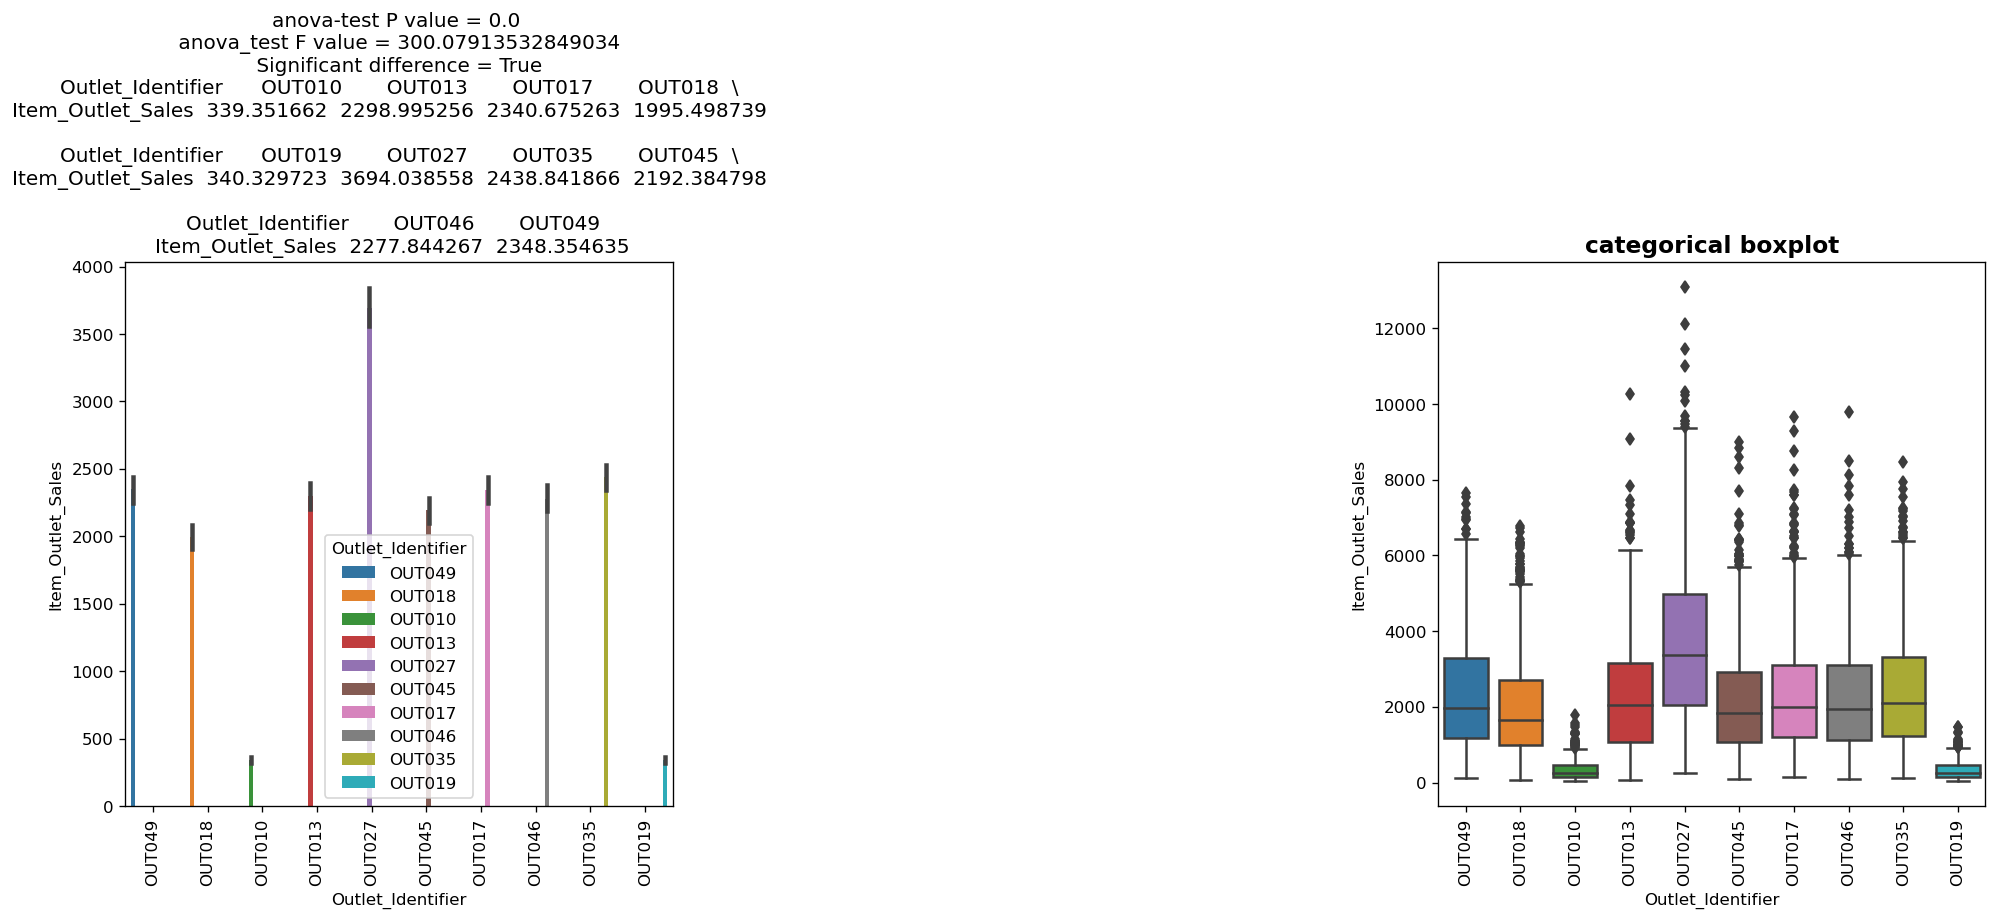

In [43]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Outlet_Identifier',p_value,f_value,sign_level = 0.05)

### **Observation:**
* There is a significance difference on the Item Outlet Sales of different stores based on store Id i.e Outlet Identifier.
* Sales of OUT049 comes from the items whose average sales lies between 200-1000.

## **Summary of Uniariate Analysis**

### **Important Observations:**
* Numerical<br>
    * The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12.
    * There are some items that are not visible at all and the maximum visibility of the item is 33%.
    * The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89.
    * Most of the stores are established in year from 1985-1990 and 1995 to 2000.
    * From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period.
    * Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000. 
  
* Categorical<br>
     *  Around 64% of the total items contains low fat while remaining contains regular fat.
     * More than 14%(ie more than 1200 items) are fruits & vegetables and snacks and foods.
     * Sale of breakfast and seafood type of items are very less.
     * All the stores are selling almost same number of items except the OUT010 and OUT019 stores.
     * 45% of the total number of items are sell from medium size store while only 15% items are sell from store which are very big.
     * 39% of the items sells from the stores laocated in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities.
     * 65% of the items are sell from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores.

* Missing Values
     * Since the percentage of missing values is very high so we can't drop these values otherwise we can miss some important information. Only way is to handle the missing values using some technique.



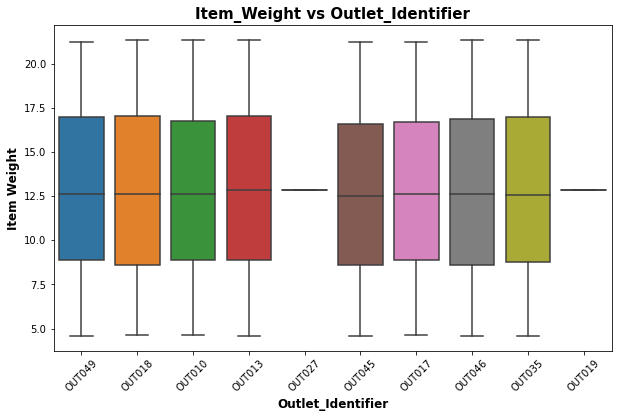

In [44]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Outlet_Identifier',y='Item_Weight',data = train_data)
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.xlabel('Outlet_Identifier', fontsize = 12, fontweight = 'bold')
plt.ylabel('Item Weight', fontsize = 12, fontweight = 'bold')
plt.title('Item_Weight vs Outlet_Identifier',fontsize = 15, fontweight = 'bold')
plt.show()

### **Observation**
* OUT027 and  OUT019 does not show the plot, so it is confirm that the missing information of Item Weught comes from the store ID OUT027 and OUT019.

In [45]:
df = train_data.copy()

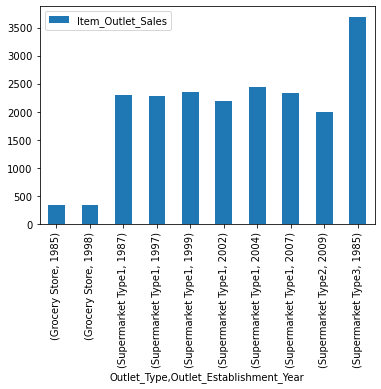

In [46]:
df.groupby(['Outlet_Type','Outlet_Establishment_Year']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(90)

**Observation**- From the above figure we can conclude that the Grocery stores have the least mean sales.

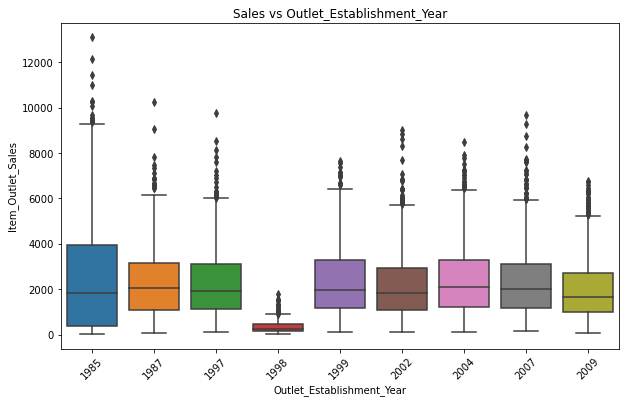

In [47]:
%matplotlib inline
plt.figure(figsize =(10,6))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales',data = df)

X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Sales vs Outlet_Establishment_Year')
plt.show()

**Observation** - It is very clear from the above boxplot that the store which was established int year 1985 has highest sales but the stores which was established in year 1998 has minimum sales

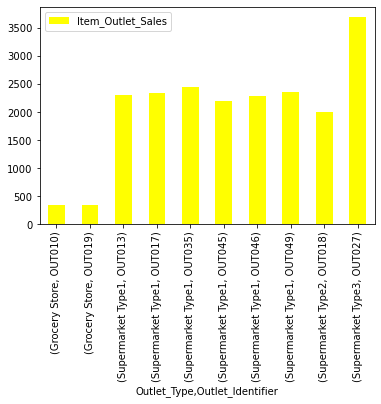

In [48]:
df.groupby(['Outlet_Type','Outlet_Identifier']).agg({'Item_Outlet_Sales':np.mean}).plot.bar(color = 'yellow')
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(90)


* OUT027 outlet, which belongs to supermarket type 3 made the highest sales whereas OUT010 and OUT019 outlets who made the least sales belong to grocery stores.

## **What is the Item Outlet Sales based on OutletType and Outlet Size?**

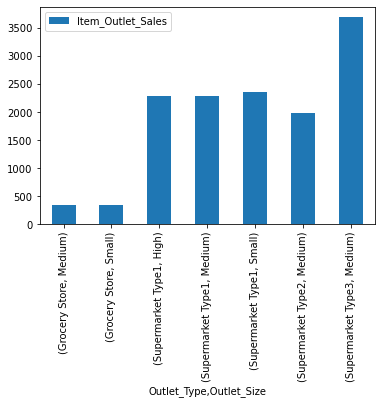

In [49]:
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(90)



* Again, it can be said from the above graph that grocery stores made the least sales wheras medium sized supermarket type 3 made the highest sales.
So, the outlet sales very much dependent on medium sized supermarkets.

# 7. Feature Engineering

**Categorical values**:

We have 7 columns we need to encode.

* Ordinal variables:
    * `Item_Fat_Content`  
    * `Outlet_Size`  
    * `Outlet_Location_Type`
    
* Nominal variables:
    * `Item_Identifier `  
    * `Item_Type`
    * `Outlet_Identifier`
    * `Outlet_Type`

* The columns `Outlet_Establishment_Year`, `Item_Identifier ` and `Outlet_Identifier` can be dropped as they don't have much significant values.
2. All Ordinal variables will be Label encoded.
3. The columns `Outlet_Type` and `Item_Type`  will be One Hot encoded.



In [50]:
# Dropping irrelevant columns

train_data  = train_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test_data = test_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [51]:
#checking the number of unique values in each column
cat_cols = train_data.select_dtypes(include = 'object')
cat_cols.apply(lambda x: x.nunique()) 

Item_Fat_Content         2
Item_Type               16
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [52]:
#lable encoding to numerical columns

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.fit_transform(test_data[i])
    
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1,0,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1,0,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,Grocery Store,732.3800
4,8.93,0,0.000000,Household,53.8614,0,2,Supermarket Type1,994.7052


In [53]:
#one hot encoding to categorical columns
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(train_data[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(test_data[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = train_data.index
te_oh.index = test_data.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
tr_fe = pd.concat([train_data, tr_oh], axis=1)
te_fe = pd.concat([test_data, te_oh], axis=1)

In [54]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,Dairy,249.8092,1,0,Supermarket Type1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,Supermarket Type2,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,Meat,141.6180,1,0,Supermarket Type1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,Grocery Store,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,Household,53.8614,0,2,Supermarket Type1,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [55]:
# Dropping categorical columns as they are no longer needed
tr_fe.drop(['Item_Type','Outlet_Type'],axis=1,inplace=True)
te_fe.drop(['Outlet_Type','Item_Type'],axis=1,inplace=True)

# 8. Machine learning models

## Models we will use:

* **Linear Regression** 
* **Random Forest Regressor** 
* **Lasso Regressor** 

## The Process of Modeling the Data:

1. Importing the model

2. Fitting the model

3. Predicting Item Outlet Sales

4. Regression metrics

### Score Metrics for Regression:

* **Mean Absolute Error (MAE)**  -  Mean of the absolute value of errors (absolute distance from true value)


* **Mean Squared Error (MSE)**  -  Mean of the squared value of errors (squared distance from true value)

* **R^2 (coefficient of determination)**  -  Regression score function


In [56]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [57]:
#Function to find cross validation score to evaluate the models
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## 8.1 Linear Regression


In [58]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [59]:
#model
LR = LinearRegression(normalize=True)

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)


In [60]:
#Evaluation on test data
#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")

 Mean Absolute Error: 837.92

 Mean Squared Error: 1287618.11

 R^2 Score: 0.5587



## 8.2. Random Forest Regressor



In [61]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)


In [62]:
#Evaluation on test data
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")

 Mean Absolute Error: 1032.24

 Mean Squared Error: 1971177.35

 R^2 Score: 0.3244



## 8.3. XGB Regressor


In [63]:
#model
xgb = XGBRegressor()
#fit
xgb.fit(X_train,y_train)

#predict
y_predict = xgb.predict(X_test)



In [64]:
#Evaluation on test data
xgb_MAE = round(MAE(y_test, y_predict),2)
xgb_MSE = round(MSE(y_test, y_predict),2)
xgb_R_2 = round(R2(y_test, y_predict),4)

print(f" Mean Absolute Error: {xgb_MAE}\n")
print(f" Mean Squared Error: {xgb_MSE}\n")
print(f" R^2 Score: {xgb_R_2}\n")

 Mean Absolute Error: 869.09

 Mean Squared Error: 1530326.07

 R^2 Score: 0.4755



## Final Result


In [65]:
MAE= [LR_MAE,RFR_MAE,xgb_MAE]
MSE= [LR_MSE,RFR_MSE,xgb_MSE]
R_2= [LR_R_2,RFR_R_2,xgb_R_2]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","XGB Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2
0,Linear Regression,837.92,1287618.11,0.5587
2,XGB Regressor,869.09,1530326.07,0.4755
1,Random Forest Regressor,1032.24,1971177.35,0.3244


## Conclusion

* `Item_MRP`  optimizes Maximum Outlet sales (positive correlation with the target).
* Linear Regression	has the best perfomance in most categories.
* only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, there for it's performance is not optimal.